# Analytic inversion of the five-point poisson operator

In [1]:
using Pkg
Pkg.activate("/Users/beckers/Google Drive/Academic/UCLA/CodingInProgress/ViscousFlow.jl");
using ViscousFlow
using Plots
using LinearAlgebra
using DifferentialEquations
# pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Grid

In [56]:
nx = 256; ny = 256;
Lx = 2.0;
dx = Lx/(nx-2);
display(dx)
w_dual_vorticity = Nodes(Dual,(nx,ny));
w_dual_lgf = Nodes(Dual,(nx,ny));
w_dual_biot_savart = Nodes(Dual,(nx,ny));
xg,yg = coordinates(w_dual_vorticity,dx=dx);
coord = [(x,y) for x in xg, y in yg];

0.007874015748031496

In [57]:
log_function(r) = 2*(log(r)+3/2*log(2)+0.57721)

log_function (generic function with 1 method)

In [58]:
L = plan_laplacian(size(w_dual_vorticity),with_inverse=true)
L⁻¹(w::T) where {T} = L\w;

In [59]:
w_dual_vorticity[Int(nx/2),Int(ny/2)] = 4*pi
w_dual_lgf = L\w_dual_vorticity;
w_dual_lgf .-= w_dual_lgf[Int(nx/2),Int(ny/2)];

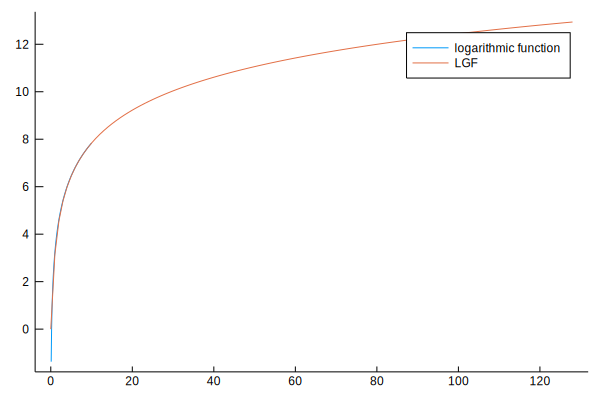

In [60]:
r_range = 0:0.1:10
x_range = xg[Int(nx/2):nx].-xg[Int(nx/2)]

plot(r_range,log_function.(r_range),label="logarithmic function")
plot!(x_range/dx,w_dual_lgf[Int(nx/2):nx,Int(ny/2)],label="LGF")